<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2024_BAN7040/blob/main/17July2024_UpDownAndSmoteSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Imbalanced Datasets


---


## Over-sampling, Under-sampling, and SMOTE

Imbalanced datasets are the STANDARD for most domains, including as fraud detection, medical diagnosis, and spam filtering;  Imbalanced data is simply where the number of examples in one class significantly outnumbers the other. This imbalance **can lead to poor** model performance, particularly for the minority class.

Let's explore three three techniques to address this issue: over-sampling, under-sampling, and Synthetic Minority Over-sampling Technique AKA SMOTE.


## Install Imbalanced Learn

`!pip install imbalanced-learn`


---


## 1. Setup

Import the necessary libraries

## 2. Generate a dataset

Here we'll use make synthetic to generate a synthetic dataset.

## 3. Train Test Plit the data

## 4. apply different imbalanced data handling to TRAINING data
- Over Sample
- Under Sample
- SMOTE

## 5. Train Models

## 6. Evalute


In [ ]:
!pip install imbalanced-learn

# 1. Setup
---
Import the necessary libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# --
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# 2. Generate a dataset
Here we'll use make_classification to generate a synthetic dataset.

- SEE: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

> NOTE: this is a great skill to have




In [ ]:
# Generate a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.05, 0.95],
                           n_informative=15,
                           #n_redundant=1,
                           flip_y=0.03,
                           n_features=20,
                           n_clusters_per_class=1,
                           n_samples=10000, random_state=10)

X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
y = pd.Series(y)
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,-1.672498,-1.907792,2.206978,-9.826880,-4.595247,2.126290,-2.800749,3.863320,5.873095,1.069319,4.213886,7.593522,0.327437,4.277106,1.859815,1.494828,3.880283,-1.557668,1.017443,-0.015431
1,0.113255,-4.169039,4.309246,-8.079669,-3.587533,-1.555439,-3.606868,1.357497,3.783067,1.411738,3.465193,6.693610,-4.546604,2.271717,0.057014,-0.765925,2.143778,-4.527483,0.193309,-0.478227
2,1.168879,-4.858492,3.018978,-10.088395,-2.437628,-2.872048,-2.776988,1.882435,3.536712,0.539261,2.933683,6.695125,-4.110229,3.656268,0.774880,-2.282263,3.230669,-2.595450,2.088375,-0.067520
3,-0.072472,0.416495,3.625380,-1.435721,-0.599763,-3.076900,-6.356896,6.470822,-2.129086,4.662778,0.878029,3.260751,-0.740602,2.950565,3.372518,0.572005,-1.456599,-3.916822,0.330798,0.324298
4,0.395002,-1.772361,1.480797,-10.349795,-3.404066,0.273368,-5.293774,5.233769,1.838402,2.830086,5.156810,3.809602,0.488340,5.191351,3.094875,-0.767806,2.586465,-0.876073,2.559900,-0.112852


# 3. Train Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(7000, 20)

# 4. Handle Imbalaned Data on TRAINING
- Over Sample
- Under Sample
- SMOTE

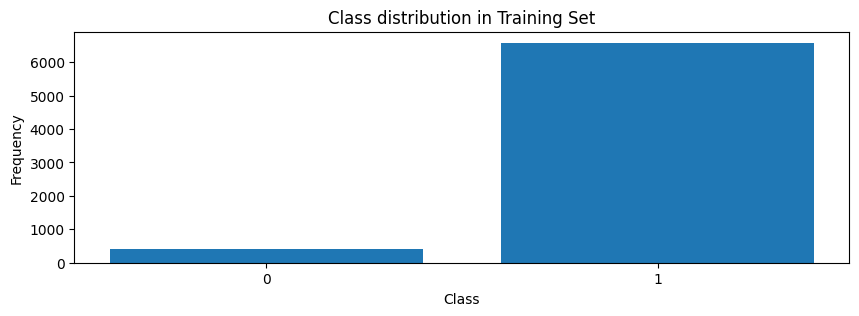

In [ ]:
def plot_class_distribution(y, title='Class distribution'):
    counter = Counter(y)
    plt.figure(figsize=(10, 3))
    plt.bar(counter.keys(), counter.values())
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('Class')
    plt.xticks(list(counter.keys()))
    plt.show()

plot_class_distribution(y_train, 'Class distribution in Training Set')


# Over/Under/SMOTE sampling
---
the challenge is to figure out what % of minority or majority sampling to address imbalance performs the best: over/under/SMOTE sampling
- is 25% good or 50% better or 100%, playing with the class?

## QUESTION!
- why do you not sample the TEST set?



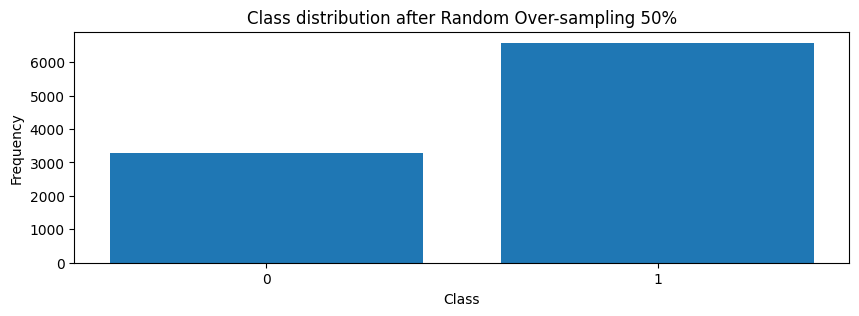

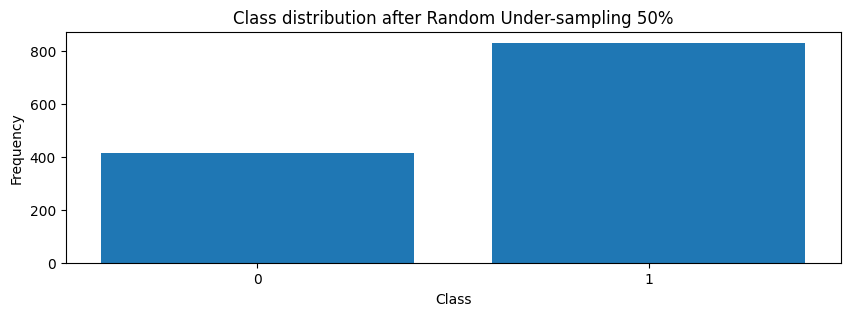

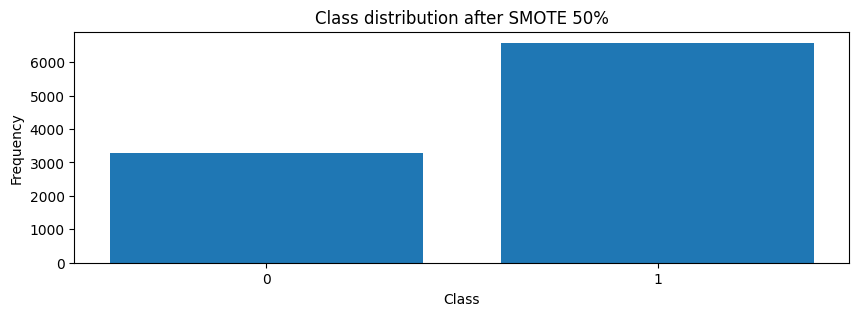

In [ ]:

# -- oversampling --
ros = RandomOverSampler(random_state=42, sampling_strategy=0.5)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
plot_class_distribution(y_ros, 'Class distribution after Random Over-sampling 50%')

# -- undersampling --
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
plot_class_distribution(y_rus, 'Class distribution after Random Under-sampling 50%')

# -- smote --
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
plot_class_distribution(y_smote, 'Class distribution after SMOTE 50%')


# 6 & 7 Train and Evaluate
---

In [ ]:
def train_and_evaluate(X_train, y_train, X_test, y_test, description):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    prob_predictions = model.predict_proba(X_test)[:, 1]
    print(f'{description}')
    #print(classification_report(y_test, predictions))
    print(f'  AUC: {roc_auc_score(y_test, prob_predictions):.4f}')

# Original dataset
train_and_evaluate(X_train, y_train, X_test, y_test, 'Original Dataset')

# Random Over-sampling
train_and_evaluate(X_ros, y_ros, X_test, y_test, 'Random Over-sampling')

# Random Under-sampling
train_and_evaluate(X_rus, y_rus, X_test, y_test, 'Random Under-sampling')

# SMOTE
train_and_evaluate(X_smote, y_smote, X_test, y_test, '**SMOTE Synthetic-sampling**')


Original Dataset
  AUC: 0.8816
Random Over-sampling
  AUC: 0.8841
Random Under-sampling
  AUC: 0.8863
**SMOTE Synthetic-sampling**
  AUC: 0.8878
